In [9]:
import time
import json
from pynput import mouse
from PIL import ImageGrab
import threading

LOG_FILE = 'mouse_click_log.json'
REGION_SIZE = 5  # This gives a 10x10 window around the click

# --- Shared state for the pixel buffer ---
buffer = {'pixels': None, 'pos': (0, 0)}
running = True

def get_pixels_around(x, y, size):
    left = int(x - size)
    top = int(y - size)
    right = int(x + size)
    bottom = int(y + size)
    img = ImageGrab.grab(bbox=(left, top, right, bottom))
    pixels = list(img.getdata())
    w, h = img.size
    pixels_matrix = [pixels[i * w:(i + 1) * w] for i in range(h)]
    return pixels_matrix

def screen_capture_thread():
    while running:
        x, y = buffer['pos']
        try:
            buffer['pixels'] = get_pixels_around(x, y, REGION_SIZE)
        except Exception as e:
            buffer['pixels'] = None  # in case screen grab fails at edge of screen
        time.sleep(0.01)  # ~100 FPS

def on_move(x, y):
    buffer['pos'] = (x, y)

def on_click(x, y, button, pressed):
    if pressed and button == mouse.Button.left:
        timestamp = time.time()
        pixels = buffer['pixels']
        log_entry = {
            'timestamp': timestamp,
            'x': x,
            'y': y,
            'pixels': pixels
        }
        print(f"Click at ({x},{y}), logging PRE-CLICK pixels...")
        with open(LOG_FILE, 'a') as f:
            f.write(json.dumps(log_entry) + '\n')

# Start screen capture buffer thread
capture_thread = threading.Thread(target=screen_capture_thread, daemon=True)
capture_thread.start()

# Start listener
print("Listening for mouse clicks (PRE-CLICK pixels). Press Ctrl+C to stop.")
with mouse.Listener(on_move=on_move, on_click=on_click) as listener:
    listener.join()

running = False


Listening for mouse clicks (PRE-CLICK pixels). Press Ctrl+C to stop.
Click at (1216.03125,264.01171875), logging PRE-CLICK pixels...
Click at (849.703125,152.04296875), logging PRE-CLICK pixels...


KeyboardInterrupt: 

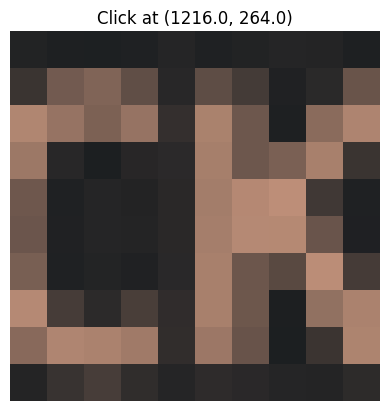

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Paste your JSON line (or load from file if you want)
data = {"timestamp": 1751476496.61655, "x": 1216.03125, "y": 264.01171875, "pixels": [[[34, 35, 36, 255], [30, 32, 34, 255], [29, 32, 34, 255], [31, 33, 35, 255], [37, 37, 38, 255], [31, 33, 35, 255], [34, 35, 36, 255], [37, 37, 38, 255], [36, 36, 37, 255], [30, 32, 34, 255]], [[58, 52, 49, 255], [114, 90, 80, 255], [128, 100, 87, 255], [96, 78, 70, 255], [40, 39, 40, 255], [94, 77, 69, 255], [68, 59, 55, 255], [32, 33, 35, 255], [42, 41, 41, 255], [105, 84, 74, 255]], [[176, 134, 113, 255], [150, 115, 99, 255], [124, 97, 84, 255], [150, 115, 99, 255], [52, 47, 46, 255], [170, 130, 109, 255], [109, 87, 77, 255], [30, 32, 34, 255], [138, 107, 92, 255], [174, 132, 112, 255]], [[156, 120, 102, 255], [40, 39, 40, 255], [28, 31, 33, 255], [40, 38, 39, 255], [43, 41, 42, 255], [166, 127, 107, 255], [109, 87, 77, 255], [122, 96, 84, 255], [168, 128, 108, 255], [58, 52, 49, 255]], [[110, 87, 77, 255], [31, 33, 35, 255], [37, 37, 38, 255], [35, 35, 36, 255], [42, 40, 40, 255], [163, 125, 106, 255], [181, 136, 115, 255], [189, 142, 120, 255], [64, 56, 53, 255], [31, 33, 35, 255]], [[107, 85, 76, 255], [32, 33, 35, 255], [37, 37, 38, 255], [36, 36, 37, 255], [42, 40, 40, 255], [165, 126, 107, 255], [181, 137, 116, 255], [181, 137, 115, 255], [105, 84, 75, 255], [31, 32, 35, 255]], [[120, 95, 83, 255], [31, 33, 35, 255], [35, 36, 37, 255], [32, 33, 35, 255], [41, 40, 41, 255], [168, 128, 108, 255], [108, 86, 76, 255], [89, 73, 65, 255], [187, 141, 119, 255], [69, 59, 55, 255]], [[181, 137, 116, 255], [70, 60, 56, 255], [44, 42, 42, 255], [73, 62, 57, 255], [48, 44, 44, 255], [168, 128, 108, 255], [109, 87, 76, 255], [29, 31, 33, 255], [145, 113, 97, 255], [171, 130, 110, 255]], [[136, 105, 91, 255], [175, 133, 113, 255], [171, 130, 110, 255], [160, 122, 104, 255], [49, 45, 44, 255], [156, 119, 102, 255], [104, 83, 74, 255], [28, 31, 33, 255], [59, 52, 49, 255], [173, 132, 111, 255]], [[36, 36, 37, 255], [56, 51, 49, 255], [71, 61, 57, 255], [48, 45, 44, 255], [37, 37, 38, 255], [46, 43, 43, 255], [42, 40, 41, 255], [37, 37, 38, 255], [36, 36, 37, 255], [45, 43, 42, 255]]]}


pixels = np.array(data['pixels'], dtype=np.uint8)

# If your pixel arrays include alpha (RGBA), but you want RGB, slice off the last channel:
if pixels.shape[-1] == 4:
    pixels_rgb = pixels[:, :, :3]
else:
    pixels_rgb = pixels

plt.imshow(pixels_rgb)
plt.title(f"Click at ({data['x']:.1f}, {data['y']:.1f})")
plt.axis('off')
plt.show()
